1. Wczytaj dane ze wszystkich plików do pojedynczej tablicy (używając Pandas).

In [1]:
import pandas as pd
import os
import re

directory_path = 'data'
txt_files = [f for f in os.listdir(directory_path) if f.endswith('.txt')]


dfs = []
combined_df = pd.DataFrame()

for i, file in enumerate(txt_files):
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path, header=None)
    df.columns = ['Name', 'Gender', 'Count']
    year = re.findall(r'\d+', file)[0]
    df['Year'] = year
    dfs.append(df)
    
combined_df = pd.concat(dfs, ignore_index=True).sort_values(['Year', 'Gender', 'Name']).reset_index(drop=True)

In [9]:
first_letters = combined_df['Count'].astype(str).apply(lambda x: x[0]).astype(int)
first_letters

0          7
1          6
2          1
3          6
4          2
          ..
2085153    8
2085154    1
2085155    6
2085156    1
2085157    8
Name: Count, Length: 2085158, dtype: int64

In [14]:
digits = [1, 2, 3, 4, 5, 6, 7, 8, 9]
sums = []
sums_df = pd.DataFrame()
for digit in digits:
    sums.append(first_letters.loc[first_letters == digit].sum())
sums_df  = pd.concat(sums, ignore_index=True)


TypeError: cannot concatenate object of type '<class 'numpy.int64'>'; only Series and DataFrame objs are valid

In [11]:
first_letters.loc[first_letters == digit].sum()

1098162

In [30]:
combined_df['first_letter'] = combined_df['Count'].astype(str).apply(lambda x: x[0])
combined_df['first_letter']
# combined_df['Count'] = combined_df['Count'][:][0]
# combined_df.pivot_table(values='Year', index=['Count'], aggfunc='count')
# combined_df.pivot_table(values='Count', )
digits = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# sum1 = combined_df['first_letter'][combined_df['first_letter'] == '0'].sum()


# sums['Count'].plot(kind='bar')

In [20]:
(combined_df['first_letter'] == str(digit)).sum()

122018

In [24]:
sums[str(digit)] = combined_df.loc[combined_df['first_letter'] == str(digit)].sum()

,1,2,3,4,5,6,7,8,9
Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AdelaAltaAltheaAmaliaAmberAngelinaAnnabelleAnn...
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF...
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15287224
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1880188018801880188018801880188018801880188018...
first_letter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999999999999999999999999999999999999999999999...


In [11]:
combined_df['first_letter'][combined_df['first_letter'] == 0].sum()

0

2. Określi ile różnych (unikalnych) imion zostało nadanych w tym czasie.

In [189]:
# unikalne imiona z podziałem na lata
pivot_table = combined_df.pivot_table(values='Name', index='Year', aggfunc='count')
print('Unikalne imiona z podziałem na lata: ')
print(pivot_table)

# unikalne imiona ogółem
print('Unikalne imiona ogółem: ')
len(combined_df['Name'].unique())

Unikalne imiona z podziałem na lata: 
       Name
Year       
1880   2000
1881   1934
1882   2127
1883   2084
1884   2297
...     ...
2018  32221
2019  32109
2020  31517
2021  31685
2022  31915

[143 rows x 1 columns]
Unikalne imiona ogółem: 


102449

3. Określi ile różnych (unikalnych) imion zostało nadanych w tym czasie rozróżniając imiona męskie i żeńskie.

In [190]:
# unikalne imiona z podziałem na lata i płeć
print('Unikalne imiona z podziałem na lata i płeć')
pivot_table = combined_df.pivot_table(values='Name', index='Year', columns='Gender', aggfunc=pd.Series.nunique)
print(pivot_table)

# unikalne imiona z podziałem na płeć ogółem
print('Unikalne imiona z podziałem na płeć ogółem')
pivot_table = combined_df.pivot_table(values='Name', index='Gender', aggfunc=pd.Series.nunique)
print(pivot_table)  

Unikalne imiona z podziałem na lata i płeć
Gender      F      M
Year                
1880      942   1058
1881      938    996
1882     1028   1099
1883     1054   1030
1884     1172   1125
...       ...    ...
2018    18126  14095
2019    17997  14112
2020    17485  14032
2021    17628  14057
2022    17660  14255

[143 rows x 2 columns]
Unikalne imiona z podziałem na płeć ogółem
         Name
Gender       
F       70227
M       43655


4. Stwórz nowe kolumny frequency_male i frequency_female i określ popularność każdego z imion w danym każdym roku dzieląc liczbę razy, kiedy imię zostało nadane przez całkowita liczbę urodzeń dla danej płci.

In [191]:
names_df_pivot = combined_df.pivot_table(index=['Year', 'Gender', 'Name'], values='Count')
births = combined_df.pivot_table(index=['Year', 'Gender'], values='Count', aggfunc='sum')

combined_df[['Frequency_male', 'Frequency_female']] = (names_df_pivot / births).reset_index().pivot_table(index=['Year', 'Gender', 'Name'], columns='Gender').reset_index()['Count'][['M', 'F']]
combined_df.head()

,Name,Gender,Count,Year,Frequency_male,Frequency_female
0,Abbie,F,71,1880,NaN,0.000780
1,Abby,F,6,1880,NaN,0.000066
2,Abigail,F,12,1880,NaN,0.000132
3,Ada,F,652,1880,NaN,0.007165
4,Adah,F,24,1880,NaN,0.000264


5. Określ i wyświetl wykres złożony z dwóch podwykresów, gdzie osią x jest skala czasu, a oś y reprezentuje:

- liczbę urodzin w danym roku (wykres na górze)
- stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku(wykres na dole) W którym roku zanotowano najmniejszą, a w którym największą różnicę w liczbie urodzeń między chłopcami a dziewczynkami (pytanie dotyczy podwykresu przedstawiającego stosunek liczby urodzin)? Odpowiedź wyznacz i wyświetl na ekranie


In [192]:
import matplotlib.pyplot as plt

In [193]:
pivot_table = combined_df.pivot_table(values='Count', columns=['Gender'], index='Year', aggfunc='sum')
ratio_girls_to_boys = pd.DataFrame()
ratio_girls_to_boys = pivot_table['F'] / pivot_table['M'].values.astype(int)

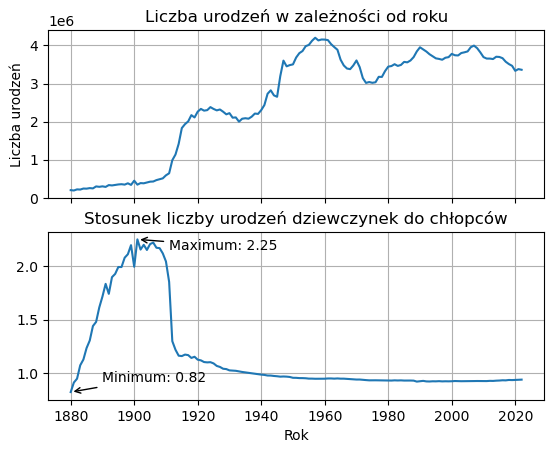

Stosunek liczby urodzeń dziewczynek do chłopców:
Największy stosunek: 2.25 w roku 1901
Najmniejsz stosunek: 0.82 w roku 1880


In [194]:
pivot_table = combined_df.pivot_table(values='Count', index='Year', aggfunc='sum')

fig, ax = plt.subplots(2, sharex=True)

years = pivot_table.index
counts = pivot_table.values

ax[0].plot(years, counts)

ax[1].plot(years, ratio_girls_to_boys)
ax[1].xaxis.set_ticks(years[::20])



min_index = int(ratio_girls_to_boys.idxmin()) - int(years[0])
min_value = ratio_girls_to_boys.min()

ax[1].annotate(f'Minimum: {min_value:.2f}', xy=(min_index, min_value), xytext=(min_index + 10, min_value + 0.1),
               arrowprops=dict(facecolor='black', arrowstyle='->'))


max_index = int(ratio_girls_to_boys.idxmax()) - int(years[0])
max_value = ratio_girls_to_boys.max()

ax[1].annotate(f'Maximum: {max_value:.2f}', xy=(max_index, max_value), xytext=(max_index + 10, max_value - 0.1),
               arrowprops=dict(facecolor='black', arrowstyle='->'))

ax[0].set_ylabel('Liczba urodzeń')
ax[0].set_title('Liczba urodzeń w zależności od roku')

ax[1].set_title('Stosunek liczby urodzeń dziewczynek do chłopców')
ax[1].set_xlabel('Rok')

ax[0].grid()
ax[1].grid()
plt.show()

print('Stosunek liczby urodzeń dziewczynek do chłopców:')
print(f'Największy stosunek: {max_value:.2f} w roku {max_index + int(years[0])}')
print(f'Najmniejsz stosunek: {min_value:.2f} w roku {min_index + int(years[0])}')

6. Wyznacz 1000 najpopularniejszych imion dla każdej płci w całym zakresie czasowym, metoda powinna polegać na wyznaczeniu 1000 najpopularniejszych imion dla każdego roku i dla każdej płci osobno. Jako najpopularniejsze należy uznać imiona, które najdłużej zajmowały wysokie miejsce na liście rankingowej, żeby uniknąć wpływu liczny urodzin w danym roku na wynik (liczba urodzin spada stąd, nieprawidłowo przeprowadzona procedura może powodować że imiona nadawane w wyżu i stosowane w tym czasie zdominują ranking) proszę ranking Top1000 określić jako sumę ważoną względnej popularności danego imienia w danym roku (patrz pkt 4)
     


In [195]:
frequency = 'Frequency_male'
top_male_names = combined_df.loc[combined_df['Gender'] == 'M'].groupby('Year').apply(lambda x: x.nlargest(n=1000, columns=frequency)).reset_index(drop=True)
top_male_names_pivot = top_male_names.pivot_table(values=frequency, index='Name', aggfunc='sum')
top_male_names_pivot = top_male_names_pivot.sort_values(by=frequency, ascending=False)[:1000]
top_male_names_pivot.columns = ['Frequency * count']
print('Najpopularniejsze imiona męskie: ')
print(top_male_names_pivot.head())

frequency = 'Frequency_female'
top_female_names = combined_df.loc[combined_df['Gender'] == 'F'].groupby('Year').apply(lambda x: x.nlargest(n=1000, columns=frequency)).reset_index(drop=True)
top_female_names_pivot = top_female_names.pivot_table(values=frequency, index='Name', aggfunc='sum')
top_female_names_pivot = top_female_names_pivot.sort_values(by=frequency, ascending=False)[:1000]
top_female_names_pivot.columns = ['Frequency * count']
print('Najpopularniejsze imiona żeńskie: ')
print(top_female_names_pivot.head())


Najpopularniejsze imiona męskie: 
         Frequency * count
Name                      
John              5.631279
James             4.876026
William           4.745829
Robert            4.008427
Charles           2.690533
Najpopularniejsze imiona żeńskie: 
           Frequency * count
Name                        
Mary                4.749131
Elizabeth           1.543251
Margaret            1.443219
Anna                1.304498
Helen               1.299765


7. Wyświetl na jednym wykresie zmiany dla imienia męskiego John i pierwszego imienia żeńskiego rankingu top-1000 (zaopatrz wykres w odpowiednią legendę):

- na osi Y po lewej liczbę razy kiedy imę zostało nadane w każdym roku (wyświetl ile razy nadano to imię w 1934, 1980 i 2022r)?
- na osi Y po prawej popularność tych imion w każdym z tych lat


Imię John w roku 1934: 46740
Imię Mary w roku 1934: 56933
Imię John w roku 1980: 35280
Imię Mary w roku 1980: 11476
Imię John w roku 2022: 7930
Imię Mary w roku 2022: 2097


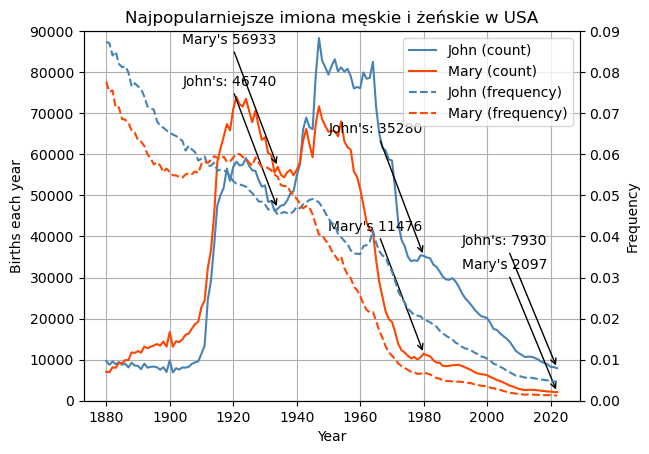

In [196]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

john_data = combined_df.loc[(combined_df['Name'] == 'John') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)

female_top_name = top_female_names_pivot.iloc[0].name
female_top_name_data = combined_df.loc[(combined_df['Name'] == female_top_name) & (combined_df['Gender'] == 'F')].sort_values(by='Year').copy().reset_index(drop=True)


# Plot count
john_data.plot(x='Year', y='Count', color='steelblue', ax=ax, label='John (count)')
female_top_name_data.plot(x='Year', y='Count', color='orangered', ax=ax, label=f'{female_top_name} (count)')

# Plot frequency
john_data.plot('Year', 'Frequency_male', color='steelblue', linestyle='--', ax=ax2, label='John (frequency)')
female_top_name_data.plot(x='Year', y='Frequency_female', color='orangered', linestyle='--', ax=ax2, label=f'{female_top_name} (frequency)')

# Capturing handles and labels for both legends
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2


ax.legend(handles, labels, loc='best')
ax2.legend().remove()

ax.set_title('Najpopularniejsze imiona męskie i żeńskie w USA')
ax.set_ylabel('Births each year')
ax2.set_ylabel('Frequency')

ax.set_ylim([0, 90_000])
ax2.set_ylim([0, 0.09])

ax.grid()

for year in ['1934', '1980', '2022']:
    john_count = john_data.loc[john_data['Year'] == year]['Count'].values[0]
    mary_count = female_top_name_data.loc[female_top_name_data['Year'] == year]['Count'].values[0]
    
    idx = john_data.loc[john_data['Year'] == year]['Count'].index.values[0]

    ax.annotate(f'John\'s: {john_count}', xy=(idx, john_count), xytext=(idx - 30, john_count + 30_000),
                   arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    ax.annotate(f'Mary\'s {mary_count}', xy=(idx, mary_count), xytext=(idx - 30, mary_count + 30_000),
                arrowprops=dict(facecolor='green', arrowstyle='->'))
    
    print(f'Imię John w roku {year}: {john_count}')
    print(f'Imię Mary w roku {year}: {mary_count}')

plt.show()

8. Wykreśl wykres z podziałem na lata i płeć zawierający informację jaki procent w danym roku stanowiły imiona należące do rankingu top1000 (wyznaczonego dla całego zbioru (pkt 6)). Wykres ten opisuje różnorodność imion, wyświetl rok, w którym zaobserwowano największą różnicę w różnorodności między imionami męskimi a żeńskimi .

In [197]:
def intersection(x, values):
    return len(set(values).intersection(set(x))) / len(x) * 100

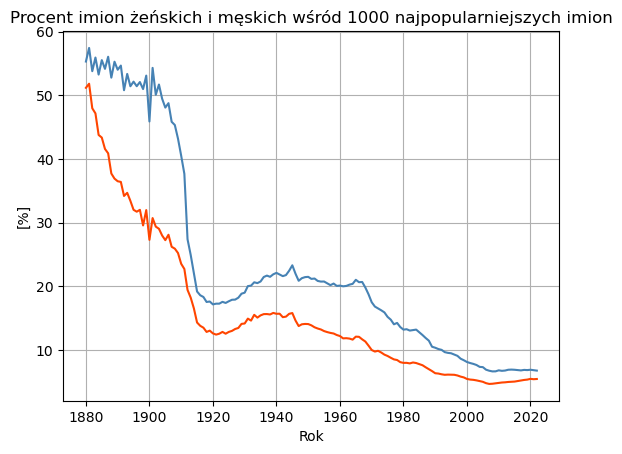

In [198]:

male_intersection = combined_df.loc[combined_df['Gender'] == 'M'].groupby('Year')['Name'].apply(intersection, top_male_names_pivot.index.values)

female_intersection = combined_df.loc[combined_df['Gender'] == 'F'].groupby('Year')['Name'].apply(intersection, top_female_names_pivot.index.values)

fig, ax = plt.subplots()

ax.plot(male_intersection, color='steelblue')
ax.plot(female_intersection, color='orangered')

ax.set_title('Procent imion żeńskich i męskich wśród 1000 najpopularniejszych imion')
ax.xaxis.set_ticks(male_intersection.index[::20])
ax.set_xlabel('Rok')
ax.set_ylabel('[%]')
plt.grid()
plt.show()


9. Zweryfikuj hipotezę czy prawdą jest, że w obserwowanym okresie rozkład ostatnich liter imion męskich uległ istotnej zmianie? W tym celu

- dokonaj agregacji wszystkich urodzeń w pełnym zbiorze danych z podziałem na rok i płeć i ostatnią literę,
- wyodrębnij dane dla lat 1917, 1967, 2022
- znormalizuj dane względem całkowitej liczby urodzin w danym roku
- wyświetl dane popularności litery dla mężczyzn w postaci wykresu słupkowego zawierającego poszczególne lata i gdzie słupki grupowane są wg litery. Wyświetl, dla której litery wystąpił największy wzrost/spadek między rokiem 1917 a 2022)
- Dla 3 liter dla których zaobserwowano największą zmianę wyświetl przebieg trendu popularności w maksymalnym przedziale czasu


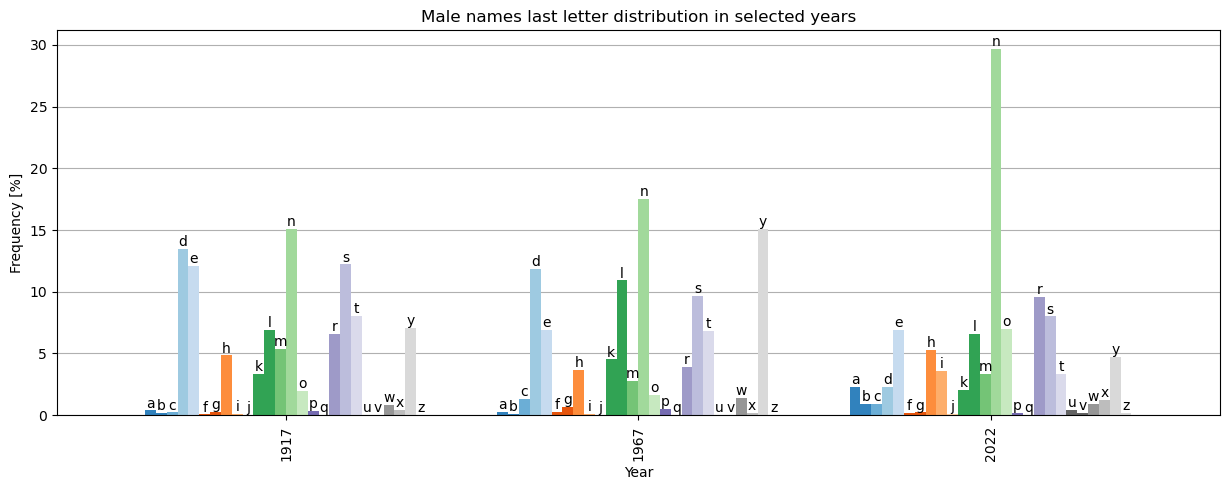

In [199]:
import numpy as np

last = pd.DataFrame(combined_df[['Year', 'Name', 'Count', 'Gender']])
last['Letter'] = last['Name'].apply(lambda x: x[-1])

# - dokonaj agregacji wszystkich urodzeń w pełnym zbiorze danych z podziałem na rok i płeć i ostatnią literę,
last_pivot = last.pivot_table(values='Count', index=['Year', 'Gender'], columns='Letter', aggfunc='sum').fillna(0)

# - znormalizuj dane względem całkowitej liczby urodzin w danym roku
last_pivot = last_pivot.div(last_pivot.sum(axis=1), axis=0) * 100
last_pivot
# last_pivot.sum(axis=1) # testing if sum is equal to 100% in each gender each year

# - wyodrębnij dane dla lat 1917, 1967, 2022
years = ['1917', '1967', '2022']

# cross section from Male gender, then years are selected from the index
selected_years_M = last_pivot.xs('M', level='Gender').loc[years]
selected_years_M

selected_years_M.plot(kind='bar', stacked=False, legend=False, figsize=(15, 5), width=0.8, colormap='tab20c')
# Get the current axes
ax = plt.gca()

# Get the x-axis tick positions and labels
x_ticks = ax.get_xticks()
x_labels = ax.get_xticklabels()

# Loop through each bar and label it with the corresponding letter
for i, bar in enumerate(ax.patches):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = selected_years_M.columns[ i // len(years)] # floor operation to get the index of the letter from the column names
    # label = i
    ax.text(x, y, label, ha='center', va='bottom')

plt.title('Male names last letter distribution in selected years')
ax.yaxis.set_label_text('Frequency [%]')
ax.grid(axis='y')
ax.set_axisbelow(True)
plt.show()


Ostatnie litery z największa zmianą:
Letter
n    7.826477
d    6.052899
y    5.414203
dtype: float64


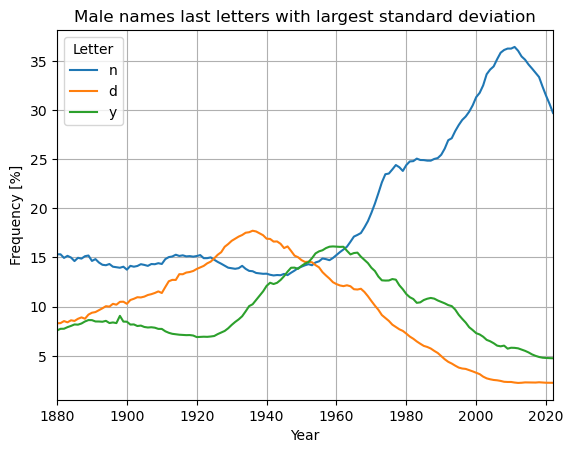

In [200]:
# - Dla 3 liter dla których zaobserwowano największą zmianę wyświetl przebieg trendu popularności w maksymalnym przedziale czasu

largest_deviations = selected_years_M.std().nlargest(3)
print('Ostatnie litery z największa zmianą:')
print(largest_deviations)

n_letters = largest_deviations.index.values

largest_deviations_data = last_pivot[n_letters].xs('M', level='Gender')

last_pivot[n_letters].xs('M', level='Gender').plot()

ax = plt.gca()
ax.yaxis.set_label_text('Frequency [%]')
ax.grid()

plt.autoscale(enable=True, axis='x', tight=True)
plt.title('Male names last letters with largest standard deviation')
plt.show()

10. Znajdź w rankingu top1000 imiona, które nadawane były zarówno dziewczynkom jak i chłopcom (stosunek nadanych imion męskich i żeńskich). Wyznacz 2 imiona, dla których zaobserwowano największą zmianę (definiowanej jako największa różnica stosunku imion męskich do żeńskich w badanych latach). Do analizy zmiany wykorzystaj 2 przedziały: zagregowane dane do roku 1930 i od roku 2000.

In [201]:
neutral_names = set(top_female_names['Name'].values).intersection(set(top_male_names['Name'].values))

In [202]:
combined_df = combined_df.astype({'Year':'int'})

first_range     = combined_df.loc[combined_df['Year'] <= 1930]
second_range    = combined_df.loc[combined_df['Year'] >= 2000]


first_values = first_range.loc[first_range['Name'].isin(neutral_names)].pivot_table(values='Count', index='Name', aggfunc='sum')
second_values = second_range.loc[second_range['Name'].isin(neutral_names)].pivot_table(values='Count', index='Name', aggfunc='sum')

print(len(first_values))
print(len(second_values))

print(len(second_values - first_values))


print(second_values - first_values)

first_values

643
711
734
             Count
Name              
Aaron     158278.0
Abbie       1741.0
Ada       -42286.0
Addie     -23814.0
Addison   139190.0
...            ...
William  -703427.0
Willie   -238849.0
Winifred  -27871.0
Winnie    -10208.0
Zion       43657.0

[734 rows x 1 columns]


,Count
Name,
Aaron,14110
Abbie,5388
Ada,59539
Addie,28451
Addison,1592
...,...
William,1094277
Willie,247724
Winifred,29904


Biggest change in ratio man to woman:  Madison, Lauren


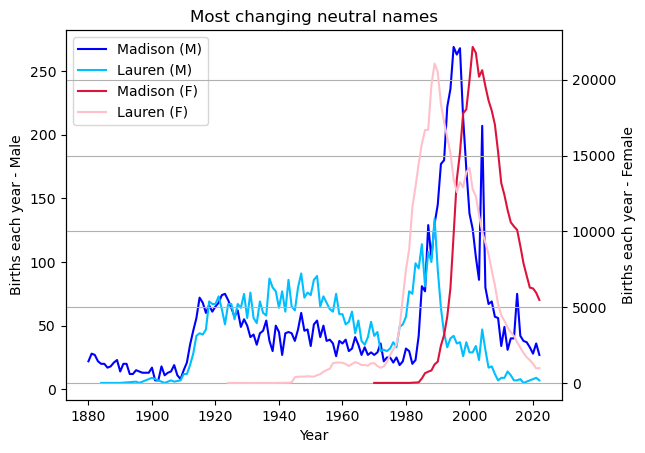

In [203]:
neutral_first_df  = first_range.loc[first_range['Name'].isin(neutral_names)]
neutral_first_pivot = neutral_first_df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')

neutral_first_pivot = neutral_first_pivot.fillna(0)
neutral_first_pivot

neutral_second_df  = second_range.loc[second_range['Name'].isin(neutral_names)]
neutral_second_pivot = neutral_second_df.pivot_table(values='Count', index='Name', columns='Gender', aggfunc='sum')

neutral_second_pivot = neutral_second_pivot.fillna(0)
neutral_second_pivot


neutral_first_pivot['Diff']    = abs(neutral_first_pivot['M'] - neutral_first_pivot['F'])
neutral_second_pivot['Diff']   = abs(neutral_second_pivot['M'] - neutral_second_pivot['F'])

neutral_first_pivot['Ratio']    = neutral_first_pivot['M'] / (neutral_first_pivot['F'] + neutral_first_pivot['M'])
neutral_second_pivot['Ratio']    = neutral_second_pivot['M'] / (neutral_second_pivot['F'] + neutral_second_pivot['M'])

diff = neutral_second_pivot['Ratio'] - neutral_first_pivot['Ratio']

print('Biggest change in ratio man to woman: ', ', '.join(diff.abs().nlargest(2).index.values))

madison_m = combined_df.loc[(combined_df['Name'] == 'Madison') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)
madison_f = combined_df.loc[(combined_df['Name'] == 'Madison') & (combined_df['Gender'] == 'F')].sort_values(by='Year').copy().reset_index(drop=True)

lauren_m = combined_df.loc[(combined_df['Name'] == 'Lauren') & (combined_df['Gender'] == 'M')].sort_values(by='Year').copy().reset_index(drop=True)
lauren_f = combined_df.loc[(combined_df['Name'] == 'Lauren') & (combined_df['Gender'] == 'F')].sort_values(by='Year').copy().reset_index(drop=True)

fig, ax = plt.subplots()
ax2 = ax.twinx()


madison_m.plot(x='Year', y='Count', color='blue', label='Madison (M)', ax=ax)
madison_f.plot(x='Year', y='Count', color='crimson', label='Madison (F)', ax=ax2)

lauren_m.plot(x='Year', y='Count', color='deepskyblue', label='Lauren (M)', ax=ax)
lauren_f.plot(x='Year', y='Count', color='pink', label='Lauren (F)', ax=ax2)

handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2


ax.legend(handles, labels, loc='best')
ax2.legend().remove()

ax.set_title('Most changing neutral names')
ax.set_ylabel('Births each year - Male')
ax2.set_ylabel('Births each year - Female')

plt.grid()
plt.show()

# PART 2

1. Wczytaj dane z bazy opisującej dane demograficzne w okresie od 1935-2020r w poszczególnych grupach wiekowych W USA: USA_demography, opis: https://www.mortality.org/Data/ExplanatoryNotes ([wersja_pdf](_resources/lab_04/Explanatory Notes.pdf)). Spróbuj zagregować dane już na etapie zapytania SQL.

In [204]:
import sqlite3 
import pandas as pd

dir = "data/"
db_name = "demography_us_2023.sqlite3"
if os.path.isfile(db_name):
    path = db_name
else:
    path = dir + db_name

conn = sqlite3.connect(path)  # connection to file-based database
cursor = conn.cursor()


query = """
SELECT 
    births.Year, 
    births.Total AS BirthTotal,
    deaths.DeathsTotal AS DeathsTotal,
    deaths.FirstYearDeaths AS FirstYearDeaths,
    population.PopulationTotal AS PopulationTotal,
    population.FirstYearPopulation AS FirstYearPopulation
FROM 
    births 
LEFT JOIN (
    SELECT Year, SUM(Total) AS DeathsTotal, FIRST_VALUE(Total) OVER (PARTITION BY Year ORDER BY Age) as FirstYearDeaths
    FROM deaths
    GROUP BY Year
) AS deaths ON births.Year = deaths.Year
LEFT JOIN (
    SELECT Year, SUM(Total) AS PopulationTotal, FIRST_VALUE(Total) OVER (PARTITION BY Year ORDER BY Age) as FirstYearPopulation
    FROM population
    GROUP BY Year
) AS population ON births.Year = population.Year
"""

cursor.execute(query)

rows = cursor.fetchall()
df = pd.DataFrame(rows, columns=['Year', 'Births', 'Deaths', 'FirsYearDeaths', 'Population', 'FirstYearPopulation'])
df.head()
conn.close()
df['Population'].fillna(df['Population'].interpolate(), inplace=True)

df.set_index('Year', inplace=True)

df.head()



,Births,Deaths,FirsYearDeaths,Population,FirstYearPopulation
Year,,,,,
1933,2307000,1342105.95,121053.88,1.252581e+08,1999833.81
1934,2396000,1396903.06,130341.42,1.259956e+08,1906141.25
1935,2377000,1392751.95,120250.92,1.268341e+08,1913110.31
1936,2355000,1479228.21,122649.98,1.276823e+08,1948130.44
1937,2413000,1450426.97,120023.27,1.284666e+08,1938518.74


<AxesSubplot:title={'center':'Zad. 12 - Przyrost naturalny'}, xlabel='Rok', ylabel='Przyrost natualny [‰]'>

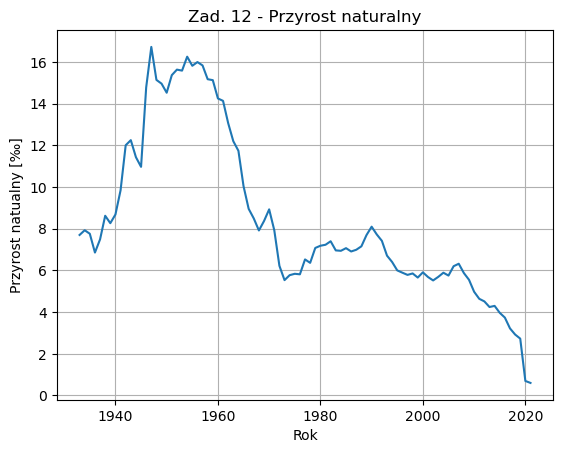

In [205]:
# 12
birthrate = (df['Births'] - df['Deaths']) / df['Population'] * 1000      
birthrate.plot(title='Zad. 12 - Przyrost naturalny', xlabel='Rok', ylabel='Przyrost natualny [‰]', grid=True)

13. Wyznacz i wyświetl współczynnik przeżywalności dzieci w pierwszym roku życia ww każdym roku analizowanego okresu.

<AxesSubplot:title={'center':'Zad. 12 - Współczynnik przeżywalności'}, xlabel='Rok', ylabel='Współczynnik przeżywalności [%]'>

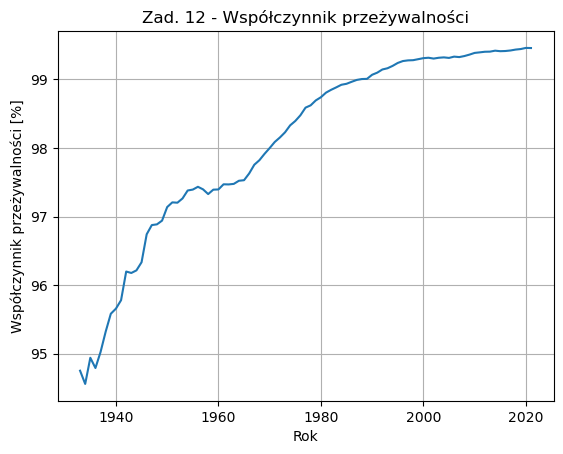

In [206]:
survivability_ratio = (df['Births'] - df['FirsYearDeaths']) / df['Births'] * 100
survivability_ratio.plot(title='Zad. 12 - Współczynnik przeżywalności', xlabel='Rok', ylabel='Współczynnik przeżywalności [%]', grid=True)


14. Dokonaj porównania różnic w przyroście naturalnym bazującym na liczbie nadawanych imion dziewczynek i chłopców w danym roku z danymi dotyczącymi liczby urodzin z bazy danych - przedstaw te różnice w formie graficznej (jako błąd względny w poszczególnych latach) - wyznacz i wyświetl informacje o roku w którym ten błąd był największy a w którym najmniejszy (węź pod uwagę wartość bezwzględną)

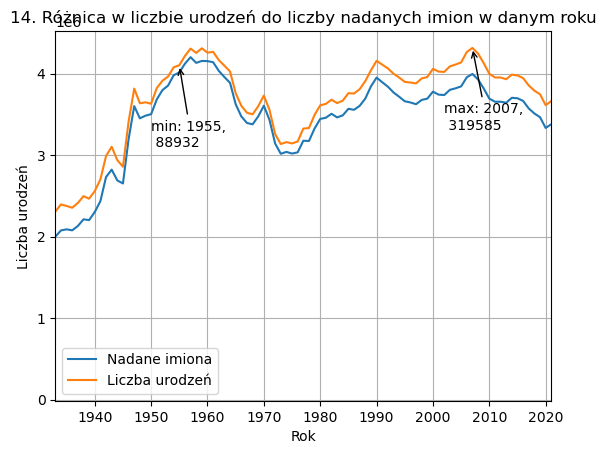

In [207]:
pivot_table = combined_df.pivot_table(values='Count', index='Year', aggfunc=sum)
pivot_table

fig, ax = plt.subplots()

ax.plot(pivot_table.index, pivot_table.values)

ax.plot(df['Births'])

df.index.min()

ax.set_xlim([df.index.min(), df.index.max()])
ax.grid()

combined_df = combined_df.astype({'Year':'int'})
trimmed_table = pivot_table.loc[(pivot_table.index >= df.index.min()) & (pivot_table.index <= df.index.max())]

diff = df['Births'] - trimmed_table.values.flatten()
diff = diff.abs()

idmin = diff.idxmin()
vmin = diff.min()
ymin = df['Births'].loc[df.index == idmin].values[0]

idmax = diff.idxmax()
vmax = diff.max()
ymax = df['Births'].loc[df.index == idmax].values[0]


ax.annotate(f'min: {idmin}, \n {vmin}', xy=(idmin, ymin), xytext=(idmin-5, ymin - 1_000_000), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate(f'max: {idmax}, \n {vmax}', xy=(idmax, ymax), xytext=(idmax-5, ymax - 1_000_000), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_title('14. Różnica w liczbie urodzeń do liczby nadanych imion w danym roku')
ax.set_ylabel('Liczba urodzeń')
ax.set_xlabel('Rok')

ax.legend(['Nadane imiona', 'Liczba urodzeń'])

<AxesSubplot:xlabel='Year'>

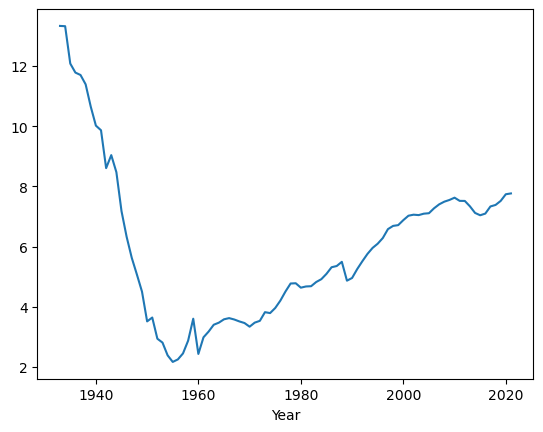

Text(0.5, 0, 'Rok')

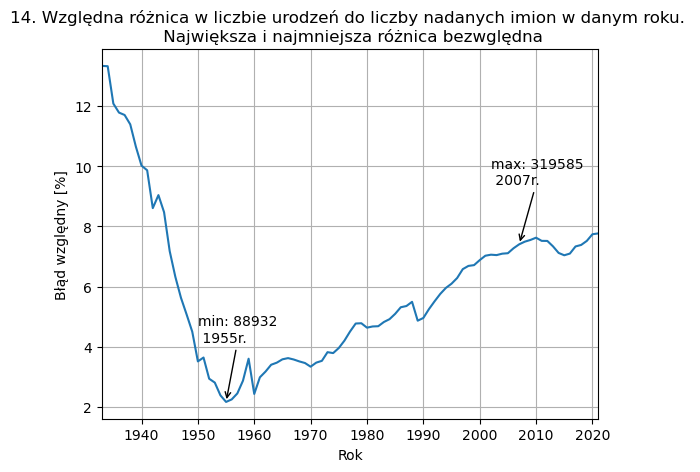

In [242]:
pivot_table = combined_df.pivot_table(values='Count', index='Year', aggfunc=sum)
pivot_table

fig, ax = plt.subplots()


df.index.min()

ax.set_xlim([df.index.min(), df.index.max()])
ax.grid()

combined_df = combined_df.astype({'Year':'int'})
trimmed_table = pivot_table.loc[(pivot_table.index >= df.index.min()) & (pivot_table.index <= df.index.max())]

diff = df['Births'] - trimmed_table.values.flatten()

diff_relative = diff / df['Births'] * 100
ax.plot(diff_relative)

diff = diff.abs()

idmin = diff.idxmin()
vmin = diff.min()
ymin = diff_relative[idmin]

idmax = diff.idxmax()
vmax = diff.max()
ymax = diff_relative[idmax]


ax.annotate(f'min: {vmin} \n {idmin}r.', xy=(idmin, ymin), xytext=(idmin - 5, ymin + 2), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate(f'max: {vmax} \n {idmax}r.', xy=(idmax, ymax), xytext=(idmax - 5, ymax + 2), arrowprops=dict(facecolor='black', arrowstyle='->'))

ax.set_title('14. Względna różnica w liczbie urodzeń do liczby nadanych imion w danym roku. \n Największa i najmniejsza różnica bezwględna')
ax.set_ylabel('Błąd względny [%]')
ax.set_xlabel('Rok')
plt.show()